# Classification for Lawny

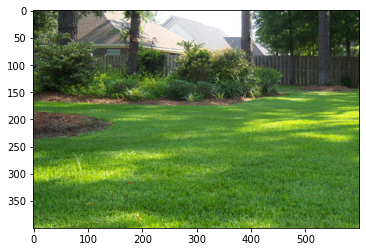

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

lawn = mpimg.imread('assets/lawn.png')
lawn_blob = mpimg.imread('assets/lawn_blob.png')

plt.imshow(lawn)

In [2]:
def color_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, np.array([65, 0.4, 0.3]), np.array([160, 1.0, 1.0]))
    return cv2.bitwise_and(image, image, mask=mask)

def color_normalize(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    for i in range(hsv.shape[0]):
        for j in range(hsv.shape[1]):
            if hsv[i][j][0] >= 65 and hsv[i][j][0] <= 160:
                hsv[i][j][1] = 1.0
                hsv[i][j][2] = 1.0
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def freq_filter(image):
    filtered = None
    for i in range(13):
        kernel = cv2.getGaborKernel((20, 20), 5, (i * 15 + 9) * math.pi / 180.0, 3, 0.5, 0, ktype=cv2.CV_32F)
        plt.figure()
        plt.imshow(kernel)
        tmp = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        if filtered is None:
            filtered = tmp
        else:
            filtered = cv2.addWeighted(filtered, i / (i + 1), tmp, 1 / (i + 1), 0.0)
        plt.figure()
        plt.imshow(tmp)
    plt.figure()
    plt.imshow(filtered)
    return filtered

def highpass_filter(image, sigma):
    return cv2.GaussianBlur(image, (0, 0), sigma) 

def pipeline(source):
#     masked = color_mask(source)
    normalized = color_normalize(source)
    gray = cv2.cvtColor(normalized, cv2.COLOR_RGB2GRAY)
    plt.figure()
    plt.imshow(gray, cmap='gray')
#     grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
#     plt.figure()
#     plt.imshow(grad_x)
#     grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
#     plt.figure()
#     plt.imshow(grad_y)
    freq = freq_filter(gray)
    highpass = highpass_filter(source, 10)
#     diff = cv2.threshold(gray - blur, 0, 255, cv2.THRESH_BINARY)[1]
    plt.figure()
    plt.imshow(highpass)
    mask = 3 - cv2.threshold(freq, 0, 3, cv2.THRESH_BINARY)[1]
    plt.figure()
    plt.imshow(mask, cmap='gray')
    masked = cv2.bitwise_and(source, source, mask=mask)
    output = color_mask(masked)
    plt.figure()
    plt.imshow(output)

C:\Users\JACKCA~1\AppData\Local\Temp/ipykernel_2628/68890353.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


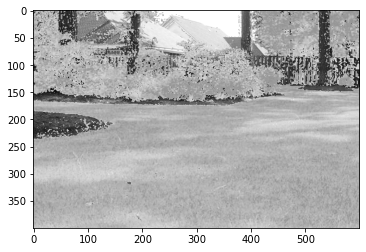

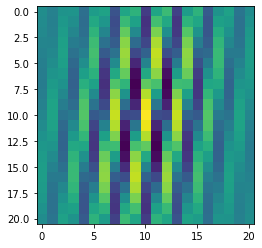

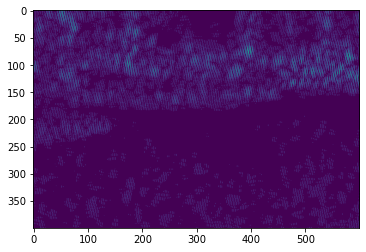

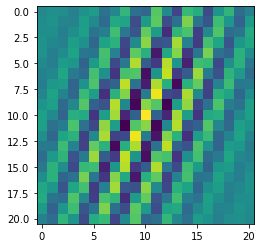

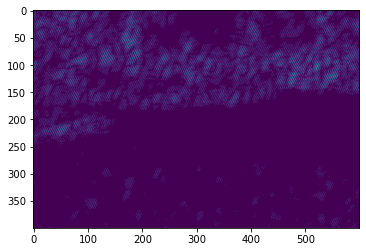

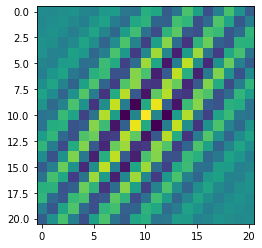

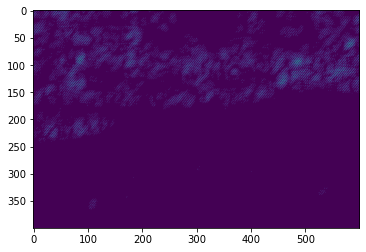

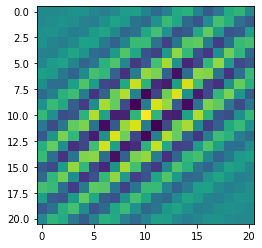

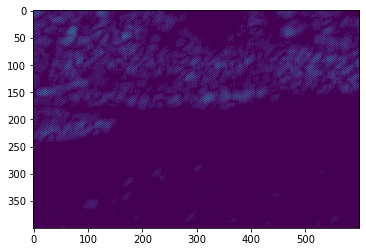

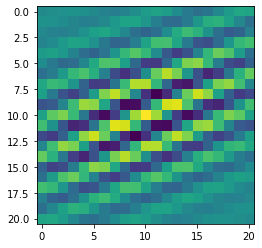

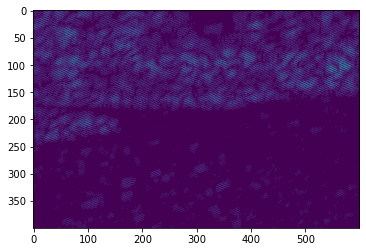

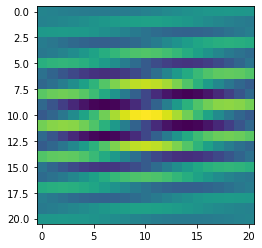

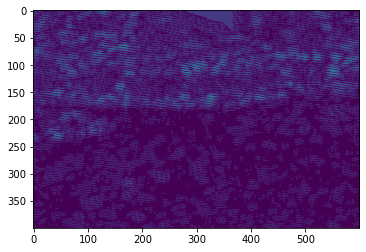

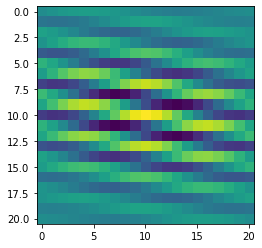

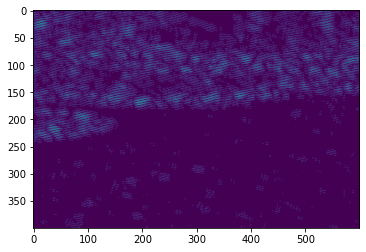

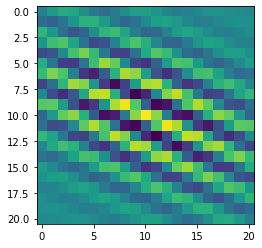

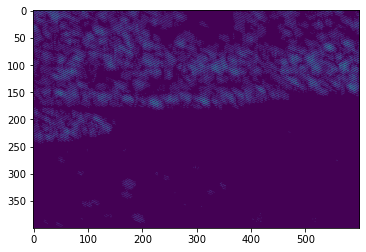

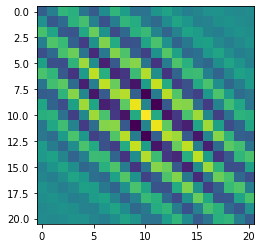

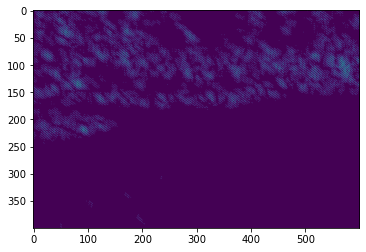

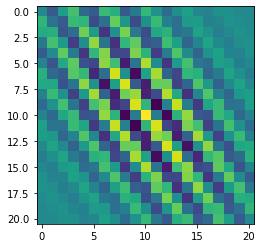

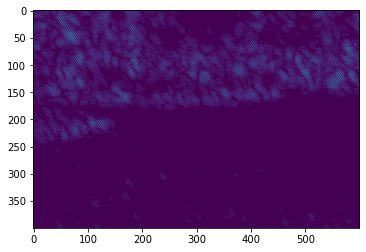

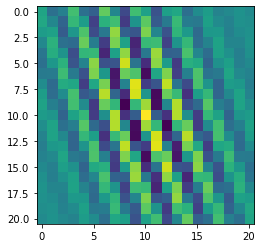

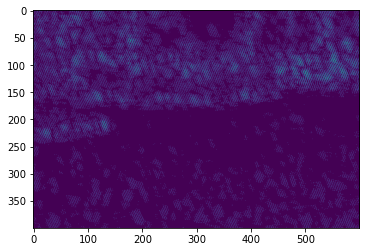

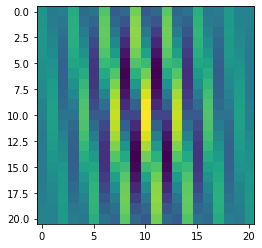

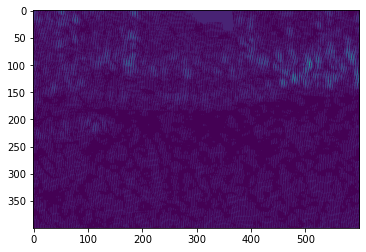

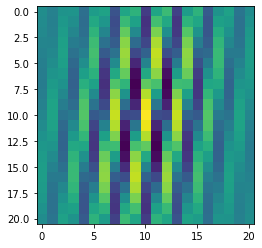

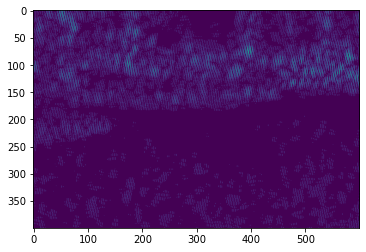

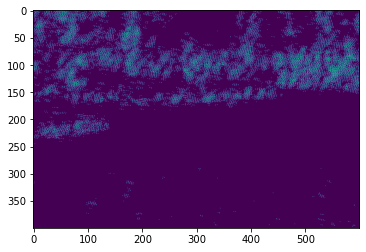

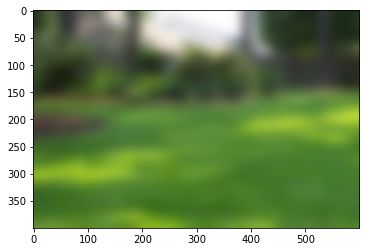

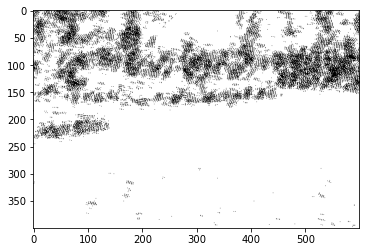

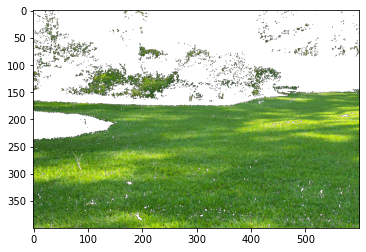

In [3]:
pipeline(lawn)

C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_36572/68890353.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


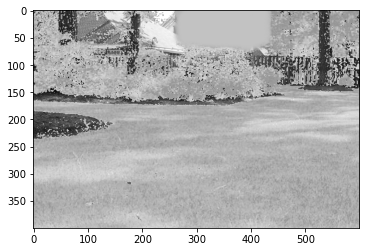

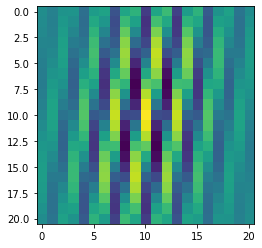

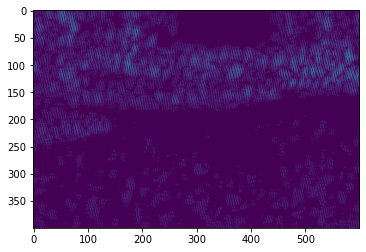

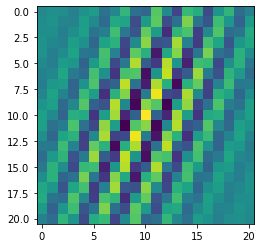

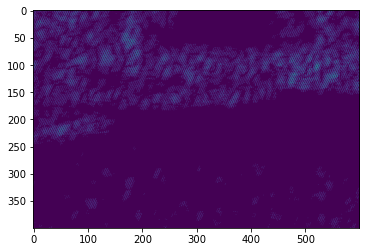

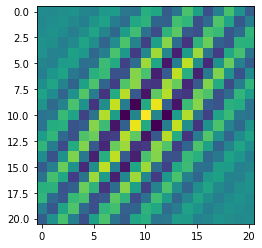

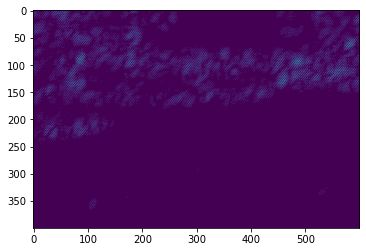

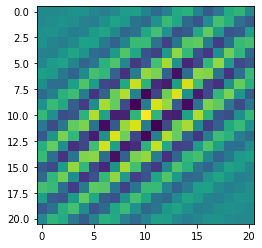

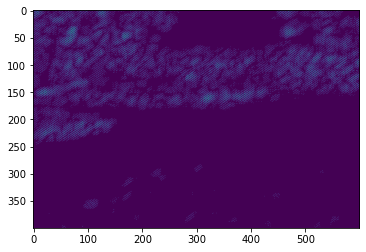

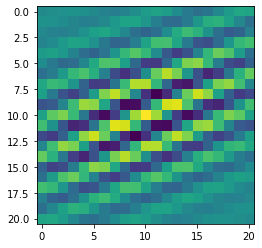

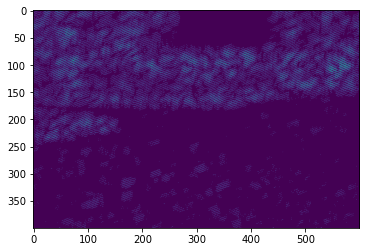

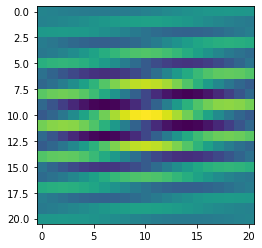

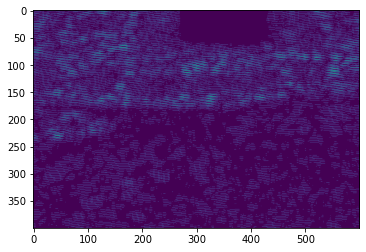

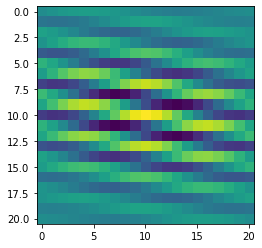

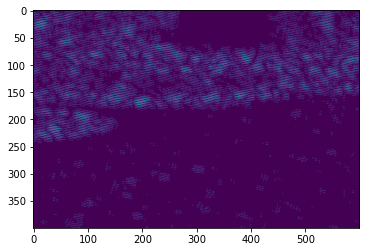

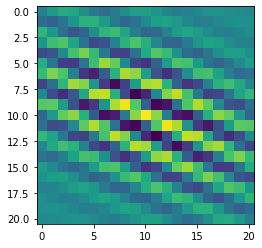

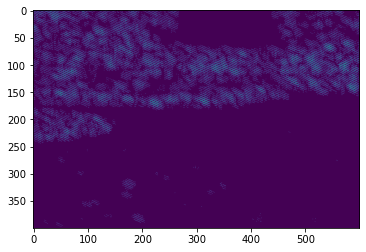

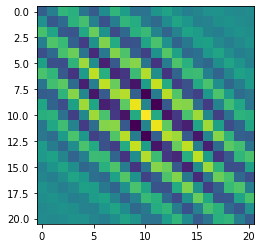

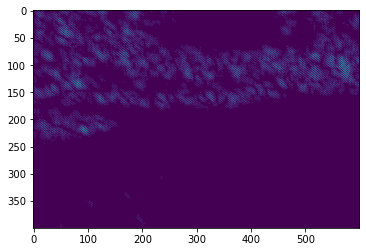

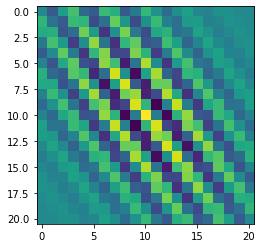

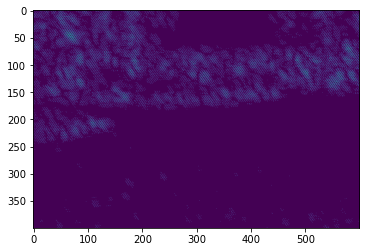

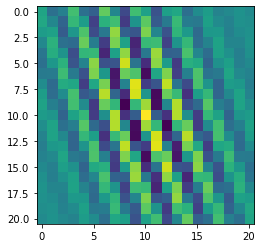

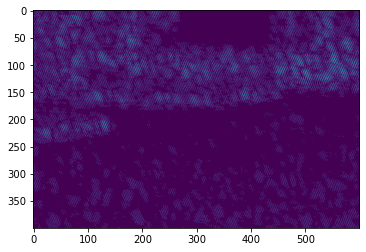

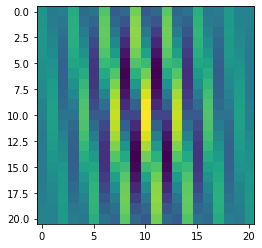

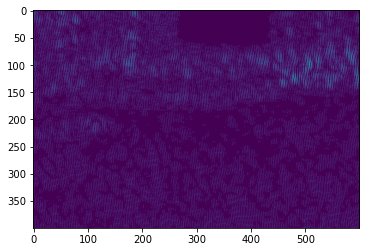

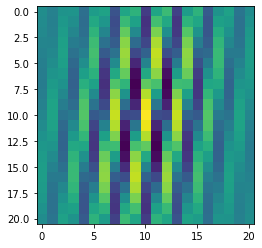

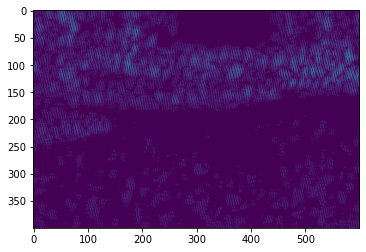

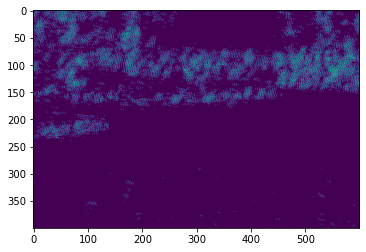

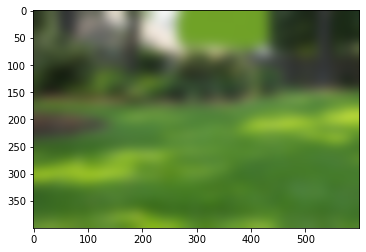

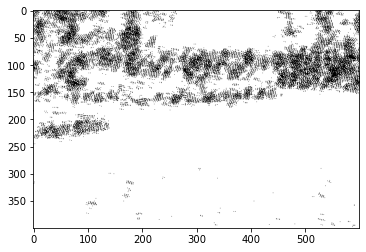

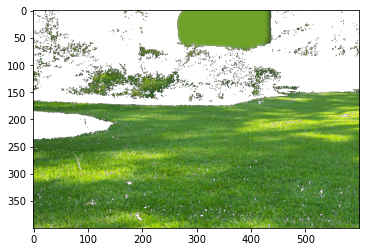

In [407]:
pipeline(lawn_blob)